In [1]:
import numpy as np
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def tokenize(sentence):
    """
    split sentence into array of words/tokens
    a token can be a word or punctuation character, or number
    """
    return nltk.word_tokenize(sentence)


def stem(word):
    """
    stemming = find the root form of the word
    examples:
    words = ["organize", "organizes", "organizing"]
    words = [stem(w) for w in words]
    -> ["organ", "organ", "organ"]
    """
    return stemmer.stem(word.lower())


def bag_of_words(tokenized_sentence, words):
    """
    return bag of words array:
    1 for each known word that exists in the sentence, 0 otherwise
    example:
    sentence = ["hello", "how", "are", "you"]
    words = ["hi", "hello", "I", "you", "bye", "thank", "cool"]
    bog   = [  0 ,    1 ,    0 ,   1 ,    0 ,    0 ,      0]
    """
    # stem each word
    sentence_words = [stem(word) for word in tokenized_sentence]
    # initialize bag with 0 for each word
    bag = np.zeros(len(words), dtype=np.float32)
    for idx, w in enumerate(words):
        if w in sentence_words: 
            bag[idx] = 1

    return bag

[nltk_data] Downloading package punkt to C:\Users\Amen
[nltk_data]     Allah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import torch
import torch.nn as nn
import torch
import numpy as np
import random
import json
from torch.utils.data import Dataset 
from torch.utils.data import DataLoader



class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.l2 = nn.Linear(hidden_size, hidden_size) 
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        # no activation and no softmax at the end
        return out

class ChatDataset(Dataset):

    def __init__(self):
        self.n_samples = len(X_train)
        self.x_data = X_train
        self.y_data = y_train

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


26 patterns
7 tags: ['delivery', 'funny', 'goodbye', 'greeting', 'items', 'payments', 'thanks']
54 unique stemmed words: ["'s", 'a', 'accept', 'anyon', 'are', 'bye', 'can', 'card', 'cash', 'credit', 'day', 'deliveri', 'do', 'doe', 'funni', 'get', 'good', 'goodby', 'have', 'hello', 'help', 'hey', 'hi', 'how', 'i', 'is', 'item', 'joke', 'kind', 'know', 'later', 'long', 'lot', 'mastercard', 'me', 'my', 'of', 'onli', 'pay', 'paypal', 'see', 'sell', 'ship', 'someth', 'take', 'tell', 'thank', 'that', 'there', 'what', 'when', 'which', 'with', 'you']
54 7
Current time: 22:32:54.407860
Epoch [1/88], Loss: 1.9312, Accuracy: 23.08%, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Epoch [2/88], Loss: 1.9218, Accuracy: 23.08%, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Epoch [3/88], Loss: 1.9126, Accuracy: 23.08%, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Epoch [4/88], Loss: 1.9036, Accuracy: 23.08%, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Epoch [5/88], Loss: 1.89

Epoch [85/88], Loss: 0.1164, Accuracy: 100.00%, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch [86/88], Loss: 0.1128, Accuracy: 100.00%, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch [87/88], Loss: 0.1092, Accuracy: 100.00%, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Epoch [88/88], Loss: 0.1056, Accuracy: 100.00%, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000


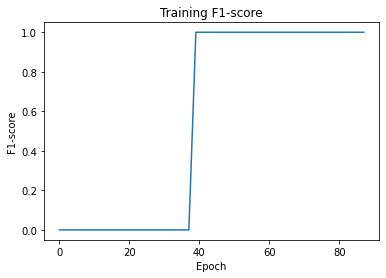

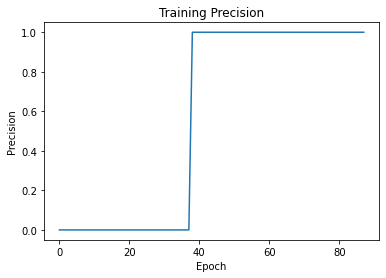

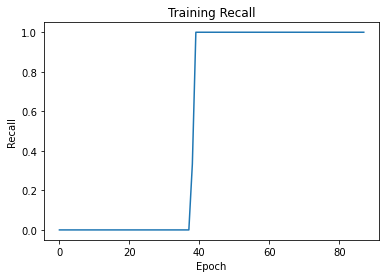

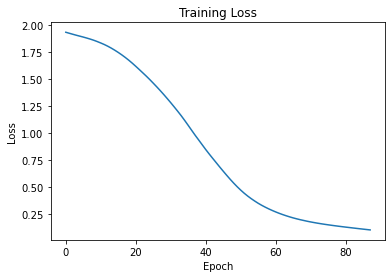

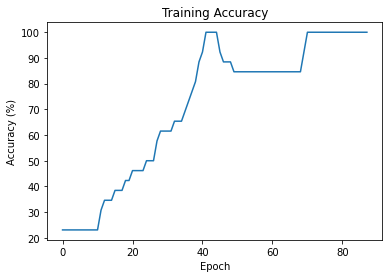

training complete. file saved to data.pth


In [3]:
import matplotlib.pyplot as plt
import datetime 
import torch
with open('intents.json', 'r') as f:
    intents = json.load(f)

all_words = []
tags = []
xy = []
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    tag = intent['tag']
    # add to tag list
    tags.append(tag)
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = tokenize(pattern)
        # add to our words list
        all_words.extend(w)
        # add to xy pair
        xy.append((w, tag))

# stem and lower each word
ignore_words = ['?', '.', '!']
all_words = [stem(w) for w in all_words if w not in ignore_words]
# remove duplicates and sort
all_words = sorted(set(all_words))
tags = sorted(set(tags))

print(len(xy), "patterns")
print(len(tags), "tags:", tags)
print(len(all_words), "unique stemmed words:", all_words)

# create training data
X_train = []
y_train = []
for (pattern_sentence, tag) in xy:
    # X: bag of words for each pattern_sentence
    bag = bag_of_words(pattern_sentence, all_words)
    X_train.append(bag)
    # y: PyTorch CrossEntropyLoss needs only class labels, not one-hot
    label = tags.index(tag)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Hyper-parameters
num_epochs = 88
batch_size = 800
learning_rate =0.01
input_size = len(X_train[0])
hidden_size = 8
output_size = len(tags)
print(input_size, output_size)

dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNet(input_size, hidden_size ,output_size).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_values = []  # List to store the loss values for each epoch



def get_f1_score(model, dataloader):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    model.eval()
    with torch.no_grad():
        for words, labels in dataloader:
            words = words.to(device)
            labels = labels.to(device)
            outputs = model(words)
            _, predicted = torch.max(outputs.data, 1)
            true_positives += ((predicted == labels) & (labels == 1)).sum().item()
            false_positives += ((predicted != labels) & (labels == 0)).sum().item()
            false_negatives += ((predicted != labels) & (labels == 1)).sum().item()

    precision = true_positives / (true_positives + false_positives+1e-8)
    recall = true_positives / (true_positives + false_negatives+1e-8)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-8)
    return f1_score

def get_precision(model, dataloader):
    true_positives = 0
    false_positives = 0
    model.eval()
    with torch.no_grad():
        for words, labels in dataloader:
            words = words.to(device)
            labels = labels.to(device)
            outputs = model(words)
            _, predicted = torch.max(outputs.data, 1)
            true_positives += ((predicted == labels) & (labels == 1)).sum().item()
            false_positives += ((predicted != labels) & (labels == 0)).sum().item()

    precision = true_positives / (true_positives + false_positives+1e-8)
    return precision

def get_recall(model, dataloader):
    true_positives = 0
    false_negatives = 0
    model.eval()
    with torch.no_grad():
        for words, labels in dataloader:
            words = words.to(device)
            labels = labels.to(device)
            outputs = model(words)
            _, predicted = torch.max(outputs.data, 1)
            true_positives += ((predicted == labels) & (labels == 1)).sum().item()
            false_negatives += ((predicted != labels) & (labels == 1)).sum().item()

    recall = true_positives / (true_positives + false_negatives+1e-8)
    return recall

def get_accuracy(model, dataloader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for words, labels in dataloader:
            words = words.to(device)
            labels = labels.to(device)
            outputs = model(words)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

accuracy_values = []  # List to store the accuracy values for each epoch
f1_score_values = [] 
precision_values = [] 
recall_values=[]
# Train the model
current_time = datetime.datetime.now().time()
print("Current time:", current_time)

for epoch in range(num_epochs):
    for words, labels in train_loader:
        words = words.to(device)
        labels = labels.to(dtype=torch.long).to(device)
        
        # Forward pass
        outputs = model(words)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())
        
    # Calculate and print the accuracy each epoch
    f1_score=get_f1_score(model,train_loader)
    recall=get_recall(model,train_loader)
    precision=get_precision(model,train_loader)
    f1_score=get_f1_score(model,train_loader)
    accuracy = get_accuracy(model, train_loader)
    accuracy_values.append(accuracy)
    f1_score_values.append(f1_score)
    precision_values.append(precision)
    recall_values.append(recall)
    if (epoch+1) %1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%, '
              f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1_score:.4f}')

# ... (rest of the code remains the same)
# Plotting F1-score
plt.plot(f1_score_values)
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.title('Training F1-score')
plt.show()

# Plotting Precision
plt.plot(precision_values)
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training Precision')
plt.show()

# Plotting Recall
plt.plot(recall_values)
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Training Recall')
plt.show()
#plotting Loss               
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
#plotting Accuracy
plt.plot(accuracy_values)
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.show()


data = {
"model_state": model.state_dict(),
"input_size": input_size,
"hidden_size": hidden_size,
"output_size": output_size,
"all_words": all_words,
"tags": tags
}

FILE = "data.pth"
torch.save(data, FILE)

print(f'training complete. file saved to {FILE}')

In [4]:
import random
import json

import torch

#from model import NeuralNet
#from nltk_utils import bag_of_words, tokenize

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with open('intents.json', 'r') as json_data:
    intents = json.load(json_data)

FILE = "data.pth"
data = torch.load(FILE)

input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()
bot_name="ADAD Chatbot"
import random
print(f"{bot_name}: Hello! I am {bot_name}. Let's chat! (Type 'exit' to end the conversation)")

while True:
    sentence = input("You: ")

    # Check if the user wants to exit the conversation
    if sentence.lower() in ["exit", "quit", "bye"]:
        print(f"{bot_name}: Goodbye! Have a great day!")
        break

    # Check if the user's sentence contains "don't talk"
    if "don't talk" in sentence.lower():
        print(f"{bot_name}: Okay, I will not talk.")
        continue

    # If the user's input is empty
    if not sentence.strip():
        print(f"{bot_name}: Please say something.")
        continue

    # Process the user's input and generate a response
    sentence = tokenize(sentence)
    X = bag_of_words(sentence, all_words)
    X = X.reshape(1, X.shape[0])
    X = torch.from_numpy(X).to(device)

    output = model(X)
    _, predicted = torch.max(output, dim=1)

    tag = tags[predicted.item()]

    probs = torch.softmax(output, dim=1)
    prob = probs[0][predicted.item()]

    if prob.item() > 0.75:
        for intent in intents['intents']:
            if tag == intent["tag"]:
                response = random.choice(intent['responses'])
                print(f"{bot_name}: {response}")

                # Check if the user's input matches any of the responses
                if ' '.join(sentence).lower() in [resp.lower() for resp in intent['responses']]:
                    print(f"{bot_name}: Yes indeed!")
                
                break
    else:
        print(f"{bot_name}: I'm sorry, but I'm not sure how to respond to that.")



ADAD Chatbot: Hello! I am ADAD Chatbot. Let's chat! (Type 'exit' to end the conversation)
You: hello
ADAD Chatbot: Hi there, what can I do for you?
You: tell me a joke
ADAD Chatbot: Why did the hipster burn his mouth? He drank the coffee before it was cool.
You: thanks 
ADAD Chatbot: Any time!
You: see you later
ADAD Chatbot: Have a nice day
You: quit
ADAD Chatbot: Goodbye! Have a great day!
